In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\lifengren\Files\Teaching\open_principles_of_microeconomics\open_principles_of_microeconomics_dev\open_principles_of_microeconomics':
  os.chdir(r'C:\Users\lifengren\Files\Teaching\open_principles_of_microeconomics\open_principles_of_microeconomics_dev\open_principles_of_microeconomics')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\lifengren\AppData\Local\Temp\ipykernel_13980\880506212.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\importlib\\_bootstrap.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\importlib\\_bootstrap_external.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\codecs.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\encodings\\aliases.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\encodings\\__init__.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\encodings\\utf_8.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\encodings\\cp1252.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\abc.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\io.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\stat.py": 1692881185.0, "C:\\Users\\lifengren\\miniforge3\\envs\\env2023\\lib\\_collections_abc.py": 1692881185.0, "C:\\Users\\lifengren\

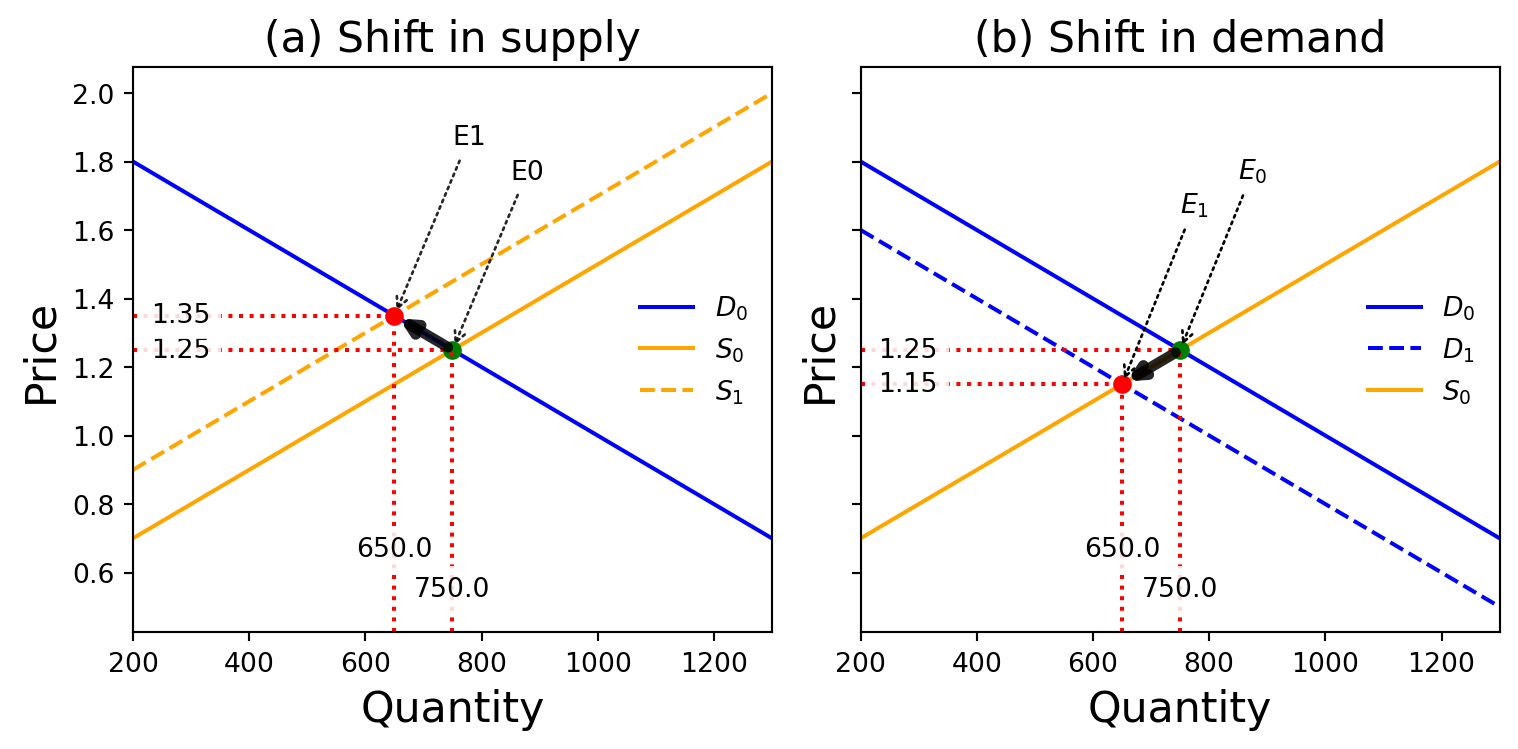

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of quantities
quantity = np.linspace(200, 1300, 100)

d0y = 2.0
d0m = -0.001
s0y = 0.5
s0m = 0.001
d1y = 1.8
d1m = -0.001
s1y = 0.7
s1m = 0.001

# Define the original demand and supply curves
def original_demand(quantity):
    return d0y + d0m * quantity

def original_supply(quantity):
    return s0y + s0m * quantity

# Define the new demand and supply curves after the shift
def new_demand(quantity):
    return d1y + d1m * quantity

def new_supply(quantity):
    return s1y + s1m * quantity

# Generate the corresponding prices for original and new curves
original_demand_price = original_demand(quantity)
new_demand_price = new_demand(quantity)
original_supply_price = original_supply(quantity)
new_supply_price = new_supply(quantity)

# Find the equilibrium points for original and new curves
original_equilibrium_quantity = (d0y - s0y) / (s0m - d0m)
original_equilibrium_price = original_demand(original_equilibrium_quantity)

new_equilibrium_quantity_supply = (d0y - s1y) / (s0m - d0m)
new_equilibrium_price_supply = original_demand(new_equilibrium_quantity_supply)

new_equilibrium_quantity_demand = (d1y - s0y) / (s0m - d0m)
new_equilibrium_price_demand = new_demand(new_equilibrium_quantity_demand)

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)






# Set titles and labels
axs[0].set_title('(a) Shift in supply', fontsize=16)
axs[0].set_xlabel('Quantity', fontsize=16)
axs[0].set_ylabel('Price', fontsize=16)
axs[0].annotate(f'{original_equilibrium_price:.2f}', xy=(.1, original_equilibrium_price), xycoords=('axes fraction', 'data'), xytext=(5, 0), textcoords='offset points', va='center', ha='right', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
axs[0].annotate(f'{original_equilibrium_quantity}', xy=(original_equilibrium_quantity, .03), xycoords=('data', 'axes fraction'), xytext=(0, 5), textcoords='offset points', va='bottom', ha='center', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
axs[0].annotate(f'{new_equilibrium_price_supply:.2f}', xy=(.1, new_equilibrium_price_supply), xycoords=('axes fraction', 'data'), xytext=(5, 0), textcoords='offset points', va='center', ha='right', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
axs[0].annotate(f'{new_equilibrium_quantity_supply}', xy=(new_equilibrium_quantity_supply, .1), xycoords=('data', 'axes fraction'), xytext=(0, 5), textcoords='offset points', va='bottom', ha='center', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))

# Plot for supply shift
axs[0].plot(quantity, original_demand_price, label='$D_0$', color='blue')
axs[0].plot(quantity, original_supply_price, label='$S_0$', color='orange')
axs[0].plot(quantity, new_supply_price, label='$S_1$', color='orange', linestyle='--')
axs[0].plot(original_equilibrium_quantity, original_equilibrium_price, 'o', color='green')
axs[0].plot(new_equilibrium_quantity_supply, new_equilibrium_price_supply, 'o', color='red')
axs[0].axhline(y=original_equilibrium_price, color='r', linestyle=':', xmax=(original_equilibrium_quantity-200)/1100)
axs[0].axvline(x=original_equilibrium_quantity, color='r', linestyle=':', ymax=(original_equilibrium_price-0.5)/1.5)
axs[0].axhline(y=new_equilibrium_price_supply, color='r', linestyle=':', xmax=(new_equilibrium_quantity_supply-200)/1100)
axs[0].axvline(x=new_equilibrium_quantity_supply, color='r', linestyle=':', ymax=(new_equilibrium_price_supply-0.5)/1.5)

# Annotate the equilibrium points
axs[0].annotate('E0', xy=(original_equilibrium_quantity, original_equilibrium_price), xytext=(original_equilibrium_quantity + 100, original_equilibrium_price + 0.5), arrowprops=dict(facecolor='grey', linestyle=':', arrowstyle='->', alpha=.85))
axs[0].annotate('E1', xy=(new_equilibrium_quantity_supply, new_equilibrium_price_supply), xytext=(new_equilibrium_quantity_supply + 100, new_equilibrium_price_supply + 0.5), arrowprops=dict(facecolor='grey', linestyle=':',  arrowstyle='->', alpha=.85))

# Add a thick arrow indicating the inward shift of the supply curve
axs[0].annotate('', xy=(new_equilibrium_quantity_supply, new_equilibrium_price_supply), xytext=(original_equilibrium_quantity, original_equilibrium_price), arrowprops=dict(facecolor='black', arrowstyle='->', alpha=.85, linewidth=4))

axs[0].legend(frameon=False)
axs[0].set_xlim(200, 1300)





axs[1].set_title('(b) Shift in demand', fontsize=16)
axs[1].set_xlabel('Quantity', fontsize=16)
axs[1].set_ylabel('Price', fontsize=16)

axs[1].annotate(f'{original_equilibrium_price:.2f}', xy=(.1, original_equilibrium_price), xycoords=('axes fraction', 'data'), xytext=(5, 0), textcoords='offset points', va='center', ha='right', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
axs[1].annotate(f'{original_equilibrium_quantity}', xy=(original_equilibrium_quantity, .03), xycoords=('data', 'axes fraction'), xytext=(0, 5), textcoords='offset points', va='bottom', ha='center', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
axs[1].annotate(f'{new_equilibrium_price_demand:.2f}', xy=(.1, new_equilibrium_price_demand), xycoords=('axes fraction', 'data'), xytext=(5, 0), textcoords='offset points', va='center', ha='right', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
axs[1].annotate(f'{new_equilibrium_quantity_demand}', xy=(new_equilibrium_quantity_demand, .1), xycoords=('data', 'axes fraction'), xytext=(0, 5), textcoords='offset points', va='bottom', ha='center', bbox=dict(fc='white', alpha=0.85, edgecolor='none'))
# Plot for demand shift
axs[1].plot(quantity, original_demand_price, label='$D_0$', color='blue')
axs[1].plot(quantity, new_demand_price, label='$D_1$', color='blue', linestyle='--')
axs[1].plot(quantity, original_supply_price, label='$S_0$', color='orange')
axs[1].plot(original_equilibrium_quantity, original_equilibrium_price, 'o', color='green')
axs[1].plot(new_equilibrium_quantity_demand, new_equilibrium_price_demand, 'o', color='red')
axs[1].axhline(y=original_equilibrium_price, color='r', linestyle=':', xmax=(original_equilibrium_quantity-200)/1100)
axs[1].axvline(x=original_equilibrium_quantity, color='r', linestyle=':', ymax=(original_equilibrium_price-0.5)/1.5)
axs[1].axhline(y=new_equilibrium_price_demand, color='r', linestyle=':', xmax=(new_equilibrium_quantity_demand-200)/1100)
axs[1].axvline(x=new_equilibrium_quantity_demand, color='r', linestyle=':', ymax=(new_equilibrium_price_demand-0.5)/1.5)

# Annotate the equilibrium points
axs[1].annotate('$E_{0}$', xy=(original_equilibrium_quantity, original_equilibrium_price), xytext=(original_equilibrium_quantity + 100, original_equilibrium_price + 0.5), arrowprops=dict(facecolor='grey', linestyle=':',  arrowstyle='->'))
axs[1].annotate('$E_{1}$', xy=(new_equilibrium_quantity_demand, new_equilibrium_price_demand), xytext=(new_equilibrium_quantity_demand + 100, new_equilibrium_price_demand + 0.5), arrowprops=dict(facecolor='grey', linestyle=':',  arrowstyle='->'))

# Add a thick arrow indicating the inward shift of the demand curve
axs[1].annotate('', xy=(new_equilibrium_quantity_demand, new_equilibrium_price_demand), xytext=(original_equilibrium_quantity, original_equilibrium_price), arrowprops=dict(facecolor='black', arrowstyle='->', alpha=.85, linewidth=4))
axs[1].legend(frameon=False)
axs[1].set_xlim(200, 1300)

# Show the plots
plt.tight_layout()
plt.show()